# Prosper Loan Data Exploration
## By Jeremy Monger

Here I will be exploring the Prosper Loan Dataset. Prosper is a peer-to-peer lending service where you micro-invest amounts as small as $25 in other user's loans.

In [1]:
#Import normal packages and set visulizations to be inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywaffle
import math
from pandas.api.types import CategoricalDtype

%matplotlib inline

## Load Dataset

In [2]:
df_dirty = pd.read_csv('prosperLoanData.csv')
df_dirty.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Assess

In [3]:
df_dirty.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df_dirty[df_dirty.BorrowerAPR.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2543 to 113921
Data columns (total 81 columns):
ListingKey                             25 non-null object
ListingNumber                          25 non-null int64
ListingCreationDate                    25 non-null object
CreditGrade                            25 non-null object
Term                                   25 non-null int64
LoanStatus                             25 non-null object
ClosedDate                             25 non-null object
BorrowerAPR                            0 non-null float64
BorrowerRate                           25 non-null float64
LenderYield                            25 non-null float64
EstimatedEffectiveYield                0 non-null float64
EstimatedLoss                          0 non-null float64
EstimatedReturn                        0 non-null float64
ProsperRating (numeric)                0 non-null float64
ProsperRating (Alpha)                  0 non-null object
ProsperScore         

In [6]:
df_dirty[df_dirty.DelinquenciesLast7Years.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 206 to 113921
Data columns (total 81 columns):
ListingKey                             990 non-null object
ListingNumber                          990 non-null int64
ListingCreationDate                    990 non-null object
CreditGrade                            990 non-null object
Term                                   990 non-null int64
LoanStatus                             990 non-null object
ClosedDate                             990 non-null object
BorrowerAPR                            965 non-null float64
BorrowerRate                           990 non-null float64
LenderYield                            990 non-null float64
EstimatedEffectiveYield                0 non-null float64
EstimatedLoss                          0 non-null float64
EstimatedReturn                        0 non-null float64
ProsperRating (numeric)                0 non-null float64
ProsperRating (Alpha)                  0 non-null object
ProsperSco

In [7]:
pd.set_option('display.max_columns',81)
df_dirty.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
df_dirty.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [9]:
df_dirty.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [10]:
df_dirty.GroupKey.unique()

array([nan, '783C3371218786870A73D20', 'EF543365873906104DC9A04',
       '6C2E3384236387493493CB6', '67033364510034901E33BC7',
       'AD9A3400384972497EDAD38', '52EA3425051368132B80C96',
       'B5F93364617561572C32B6D', 'EE3833815612811323B64D2',
       '5EA73366320555283BA0246', '3D4D3366260257624AB272D',
       'A0CB3365552651755022A2E', 'B7BA33816687475120A8407',
       '156C3413203271953DEACE5', '4707336438924330015F446',
       '53B43365132049036C341A5', '6A3B336601725506917317E',
       'CC8D33653247904019A9059', '53B233889590051997E1E14',
       '5AFC33643897547591BD1C8', 'F555336594467179889CEFB',
       'B0473364376920128370B13', '4AC5336492870256755D273',
       'E3F433654060844916DB34F', 'DF643377029116179E7EDA3',
       'BAE93365625072437A1CBD9', 'FEF83377364176536637E50',
       '6CE133644751358832D593B', 'A8113366311579615424760',
       '85943386927308216031C0F', '25CB3382578620681398C96',
       'C80D337515684920818AB06', '214933649218625265C08F1',
       '29D03365204

In [11]:
df_dirty.FirstRecordedCreditLine.head()

0    2001-10-11 00:00:00
1    1996-03-18 00:00:00
2    2002-07-27 00:00:00
3    1983-02-28 00:00:00
4    2004-02-20 00:00:00
Name: FirstRecordedCreditLine, dtype: object

In [12]:
df_dirty[df_dirty.ListingKey.duplicated(keep=False)].sort_values(by='ListingKey').head(8)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32680,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,5.0,1,NY,Other,Employed,69.0,False,False,NaN,2013-11-04 15:15:31,660.0,679.0,2003-09-07 00:00:00,18.0,17.0,28.0,14,677.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,15512.0,0.86,2212.0,28.0,0.96,1.0,0.42,"$25,000-49,999",True,2773.333333,A352369967047316033A599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,118852,5000,2013-11-26 00:00:00,Q4 2013,ED2F3696548507863FAC18D,185.31,553.2177,311.63,241.5877,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32681,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,6.0,1,NY,Other,Employed,69.0,False,False,NaN,2013-11-04 15:15:31,660.0,679.0,2003-09-07 00:00:00,18.0,17.0,28.0,14,677.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,15512.0,0.86,2212.0,28.0,0.96,1.0,0.42,"$25,000-49,999",True,2773.333333,A352369967047316033A599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,118852,5000,2013-11-26 00:00:00,Q4 2013,ED2F3696548507863FAC18D,185.31,553.2177,311.63,241.5877,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32964,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,4.0,1,TX,Nurse (RN),Employed,218.0,True,False,NaN,2013-10-07 15:47:39,660.0,679.0,1990-06-04 00:00:00,21.0,20.0,53.0,13,858.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,30682.0,0.65,11343.0,51.0,0.86,0.0,0.31,"$100,000+",True,10000.000000,1C5336968140286844BD165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,106820,25000,2013-10-21 00:00:00,Q4 2013,FCEA3695208015694B2A2B6,659.57,2746.0084,1311.77,1434.2384,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
17274,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,6.0,1,TX,Nurse (RN),Employed,218.0,True,False,NaN,2013-10-07 15:47:39,660.0,679.0,1990-06-04 00:00:00,21.0,20.0,53.0,13,858.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,30682.0,0.65,11343.0,51.0,0.86,0.0,0.31,"$100,000+",True,10000.000000,1C5336968140286844BD165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,106820,25000,2013-10-21 00:00:00,Q4 2013,FCEA3695208015694B2A2B6,659.57,2746.0084,1311.77,1434.2384,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7478,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,0.22530,0.1325,0.09280,2.0,E,2.0,1,VA,Professional,E

In [13]:
df_dirty.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [14]:
df_dirty.query('ProsperScore > 10')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
69,0F37360159310530849DA23,1162592,2014-01-25 12:07:54.537000000,NaN,60,Current,NaN,0.13636,0.1139,0.1039,0.09989,0.0349,0.06499,6.0,A,11.0,1,IL,Investor,Self-employed,12.0,True,True,NaN,2014-01-25 11:51:41,700.0,719.0,1995-08-01 00:00:00,5.0,5.0,21.0,3,373.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19961.0,0.79,5039.0,21.0,1.00,0.0,NaN,"$25,000-49,999",False,2700.000000,B08137048491184083D747A,3.0,16.0,16.0,0.0,0.0,7861.0,0.02,NaN,0,NaN,2,128889,9000,2014-01-29 00:00:00,Q1 2014,87D0340317005703964722E,197.44,194.6315,115.99,78.6415,-7.15,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
158,108E36027739898797E47EC,1202850,2014-02-12 16:31:25.340000000,NaN,36,Current,NaN,0.09469,0.0809,0.0709,0.06919,0.0199,0.04929,7.0,AA,11.0,6,OR,Tradesman - Mechanic,Employed,22.0,False,False,NaN,2014-02-12 16:31:27,700.0,719.0,1999-05-28 00:00:00,9.0,8.0,24.0,8,187.0,0.0,6.0,1.0,15599.0,5.0,0.0,0.0,2564.0,0.14,14737.0,22.0,0.95,0.0,0.05,"$75,000-99,999",True,6666.666667,647F370507135609705F686,1.0,15.0,15.0,0.0,0.0,4500.0,0.01,NaN,0,NaN,1,131445,5500,2014-02-14 00:00:00,Q1 2014,DEC134038262954645D0ADF,172.58,221.3610,206.73,14.6310,-1.96,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
224,2F293599751524472C82DEA,1130508,2014-01-10 07:24:44.853000000,NaN,36,Current,NaN,0.13799,0.1099,0.0999,0.09628,0.0324,0.06388,6.0,A,11.0,1,WI,Sales - Commission,Employed,114.0,True,False,NaN,2014-01-10 07:24:47,720.0,739.0,1995-10-02 00:00:00,16.0,16.0,41.0,12,1435.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,55769.0,0.34,103931.0,41.0,0.92,0.0,0.11,"$100,000+",True,33333.333333,5B37370457127496019ABA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126722,30000,2014-01-15 00:00:00,Q1 2014,A74E37037632653842E0DBD,982.02,972.9871,702.00,270.9871,-25.48,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
236,11D335932344051959C94C6,973657,2013-11-02 01:29:09.810000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,0.05001,0.0074,

In [15]:
df_dirty.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

### Issues
#### Quality:
1. 25 rows missing BorrowerAPR  and other fields
2. 990 rows missing deliquency related information
3. ListingCreationDate,ClosedDate, LoanOriginationDate, FirstRecordedCreditLine DateCreditPulled are not datetimes
4. CreditGrade, LoanStatus, ProsperRating (numeric), ProsperRating (alpha), Occupation, EmploymentStatus, ListingCategory (numeric), IncomeRange,  are not categorical
5. Lots of duplicate rows with only prosper rating changing


## Cleaning

In [16]:
df = df_dirty.copy()

### Datapoints missing many fields
#### Define:
Remove rows missing BorrowerAPR or DelinquenciesLast7Years 
#### Code:

In [17]:
df.dropna(subset = ['DelinquenciesLast7Years','BorrowerAPR'], inplace=True)

#### Test:

In [18]:
df[['DelinquenciesLast7Years','BorrowerAPR']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112947 entries, 0 to 113936
Data columns (total 2 columns):
DelinquenciesLast7Years    112947 non-null float64
BorrowerAPR                112947 non-null float64
dtypes: float64(2)
memory usage: 2.6 MB


### Duplicate Rows
#### Define:
Remove duplicate rows

#### Code:

In [19]:
df.drop_duplicates(subset='ListingKey', inplace=True)

#### Test:

In [20]:
df[df.ListingKey.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


### Datetimes
#### Define:
Correct data type of dates
#### Code:

In [21]:
dates = ['ListingCreationDate','ClosedDate', 'LoanOriginationDate', 'FirstRecordedCreditLine', 'DateCreditPulled']
df[dates] = df[dates].apply(pd.to_datetime)

#### Test:

In [22]:
df[dates].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112076 entries, 0 to 113936
Data columns (total 5 columns):
ListingCreationDate        112076 non-null datetime64[ns]
ClosedDate                 54086 non-null datetime64[ns]
LoanOriginationDate        112076 non-null datetime64[ns]
FirstRecordedCreditLine    112076 non-null datetime64[ns]
DateCreditPulled           112076 non-null datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 5.1 MB


In [23]:
df[dates].head()

,ListingCreationDate,ClosedDate,LoanOriginationDate,FirstRecordedCreditLine,DateCreditPulled
0,2007-08-26 19:09:29.263,2009-08-14,2007-09-12,2001-10-11,2007-08-26 18:41:46.780
1,2014-02-27 08:28:07.900,NaT,2014-03-03,1996-03-18,2014-02-27 08:28:14.000
2,2007-01-05 15:00:47.090,2009-12-17,2007-01-17,2002-07-27,2007-01-02 14:09:10.060
3,2012-10-22 11:02:35.010,NaT,2012-11-01,1983-02-28,2012-10-22 11:02:32.000
4,2013-09-14 18:38:39.097,NaT,2013-09-20,2004-02-20,2013-09-14 18:38:44.000


### Categories 
#### Define: 
Change categorical data to the correct data type

#### Code:

CreditGrade, LoanStatus, ProsperRating (numeric), ProsperRating (alpha), Occupation, EmploymentStatus, ListingCategory (numeric), IncomeRange

In [24]:
#Sequentials
cols = ['CreditGrade', 'LoanStatus', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'Occupation', 
       'EmploymentStatus', 'ListingCategory (numeric)', 'IncomeRange']
df[cols] = df[cols].astype('category')

#### Test:

In [25]:
df[cols].dtypes

CreditGrade                  category
LoanStatus                   category
ProsperRating (numeric)      category
ProsperRating (Alpha)        category
Occupation                   category
EmploymentStatus             category
ListingCategory (numeric)    category
IncomeRange                  category
dtype: object

### What is the structure of your dataset?
The dataset contains information on over 113,000 loans originated through the platform. It contains 81 columns that gives a bunch of information each other, from various dates (listing, origination, to closed), to information about the borrower (occupation, past delenquincies, etc.) to the status of the loan.

### What is/are the main feature(s) of interest in your dataset?
I am most interested in the "LoanStatus" column. Whether or not a borrower successfully pays their debt seems the most useful thing to know.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The various ratings ('CreditGrade', 'ProsperRating', etc.) are likely to have an immediate impact. Also, as this dataset overlaps a Black Swan event (The Great Recession), it will be interesting to see how that affects the data. There are too many other columns that *might* be interesting to name, so hopefully I will find some during exploration

## Explore:

### Basic histograms, count plots, etc.

In [26]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

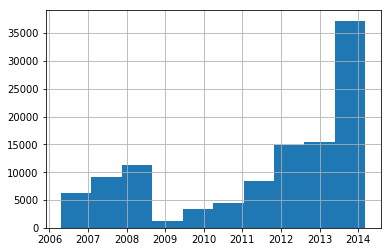

In [27]:
df['ListingCreationDate'].hist();

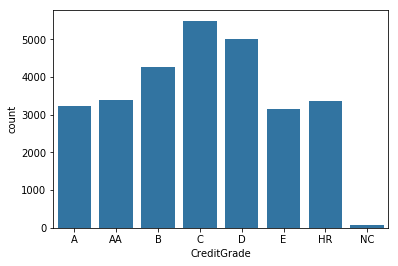

In [28]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'CreditGrade', color = base_color);


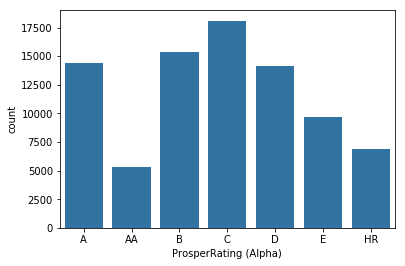

In [29]:
sns.countplot(data = df, x = 'ProsperRating (Alpha)', color = base_color);

Oops! Categories should be sequential!
#### Define:
Order categories for 'CreditGrade' and 'ProsperRating (Alpha)'
#### Code:

In [30]:
rating = CategoricalDtype(categories=['AA','A', 'B','C','D','E','HR','NC'], ordered=True)
df[['CreditGrade','ProsperRating (Alpha)']] = df[['CreditGrade','ProsperRating (Alpha)']].astype(rating)

#### Test:

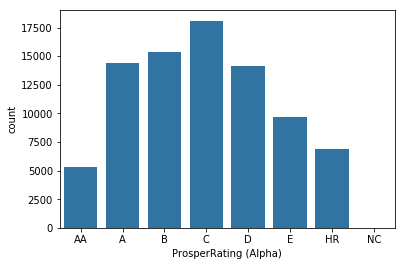

In [31]:
sns.countplot(data = df, x = 'ProsperRating (Alpha)', color = base_color);

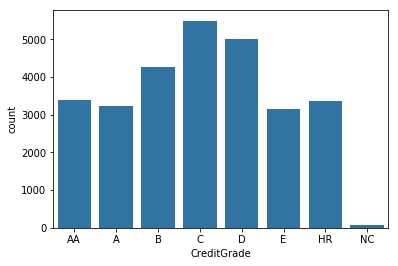

In [32]:
sns.countplot(data = df, x = 'CreditGrade', color = base_color);

Well I'm back to wrangling fast. We can combine these two.

#### Define:
Combine 'CreditGrade' and 'ProsperRating (Alpha)' columns

#### Code :

In [33]:
df['CreditGrade'].fillna(df['ProsperRating (Alpha)'], inplace=True)

#### Test:

In [34]:
df['CreditGrade'].value_counts(dropna=False)

C      23588
B      19643
D      19167
A      17611
E      12873
HR     10269
AA      8724
NaN      131
NC        70
Name: CreditGrade, dtype: int64

#### Define:
Remove nulls and no credits.

#### Code:

In [35]:
df.dropna(subset = ['CreditGrade'], inplace=True)

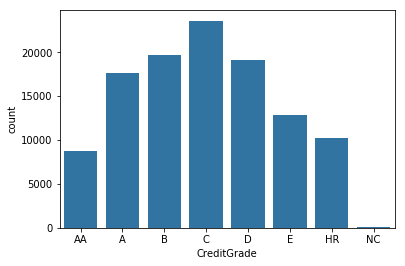

In [36]:
sns.countplot(data = df, x = 'CreditGrade', color = base_color);

In [37]:
df.query('CreditGrade == "NC"').shape

(70, 81)

In [38]:
df = df[df.CreditGrade != "NC"]
df.CreditGrade.cat.remove_unused_categories(inplace=True)

#### Test:

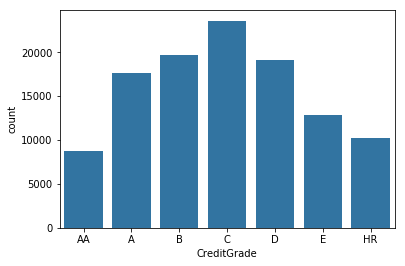

In [39]:
sns.countplot(data = df, x = 'CreditGrade', color = base_color);

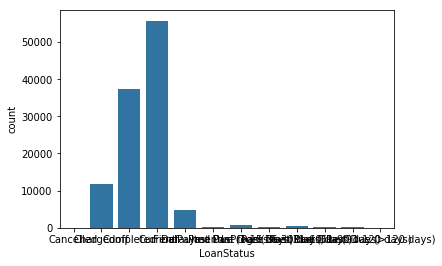

In [40]:
sns.countplot(data = df, x = 'LoanStatus', color = base_color);

So, data wrangling makes up 80% of the data analysis process

In [41]:
df.LoanStatus.unique()

[Completed, Current, Past Due (1-15 days), Defaulted, Chargedoff, ..., Past Due (31-60 days), Past Due (91-120 days), FinalPaymentInProgress, Past Due (>120 days), Cancelled]
Length: 12
Categories (12, object): [Completed, Current, Past Due (1-15 days), Defaulted, ..., Past Due (91-120 days), FinalPaymentInProgress, Past Due (>120 days), Cancelled]

In [42]:
df.groupby('LoanStatus').ListingKey.nunique()

LoanStatus
Cancelled                     2
Chargedoff                11849
Completed                 37275
Current                   55730
Defaulted                  4759
FinalPaymentInProgress      203
Past Due (1-15 days)        800
Past Due (16-30 days)       265
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (>120 days)         16
Name: ListingKey, dtype: int64

While there are problaby some interesting insights that can be drawn from all those ongoing loans, I know I'm more interested in completed loans. Its a *painful* amount of data lost, but I really only want 'Chargedoff','Completed' and 'Defaulted'.

#### Define:
Only include finished loan statuses
#### Code:

In [43]:
df = df.loc[df.LoanStatus.isin(['Chargedoff','Completed', 'Defaulted'])]
df.LoanStatus.cat.remove_unused_categories(inplace=True)

#### Test:

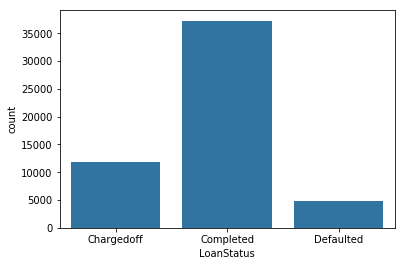

In [44]:
sns.countplot(data = df, x = 'LoanStatus', color = base_color);

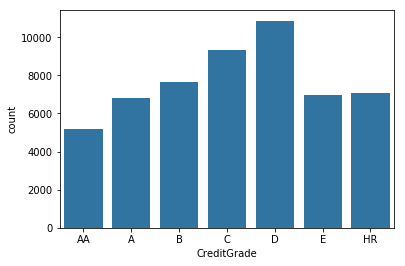

In [45]:
sns.countplot(data = df, x = 'CreditGrade', color = base_color);

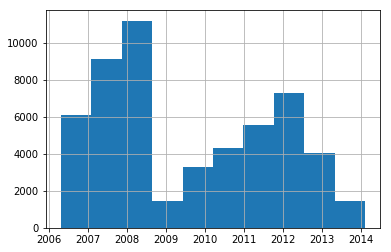

In [46]:
df['ListingCreationDate'].hist();

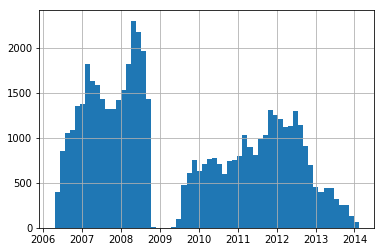

In [47]:
df['ListingCreationDate'].hist(bins=60);

**Note:** This is technically out of order. I had actually missed the "gap" at this point and had scrolled up while getting iffy results later on.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

CreditGrade/ProsperRating: These were two seperate columns I had to combine.

LoanStatus: With so many loans still be active, where we do not know the outcome, I decided to reduce this to only finished loans. Out of those, the majority were "Completed" over "Chargedoff" and "Defaulted".

ListingCreationDate: We have a large gap in the middle of our data.


### Exploring bivariate relationships  
CreditGrade and LoanStatus seem like the best starting point. 

LoanStatus: Understanding default risks is a big part of knowing the risk/reward of investing in a loan.

CreditGrade: Gives us a baseline for risk/reward. Given that your highly likely to use this in your criteria, exploring other variables without knowing how they relate to CreditGrade could create false assumptions. Ie, a variable could show that 'X' type loans greatly outperform 'Y' type loans, but 'X' types loans are already factored into better credit grades, this doesn't imply you should keep an eye out for 'X' type loans in your E/HR fund. 

I'm actually guessing that Prosper is fairly competent and its going to be tricky for me to find anything that can't just traced to CreditGrade. We'll see!

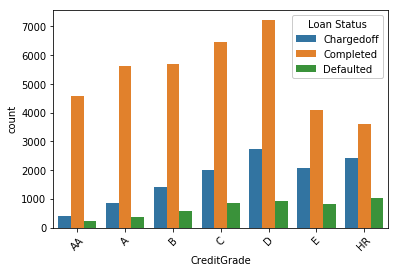

In [48]:
ax = sns.countplot(data = df, x = 'CreditGrade', hue = 'LoanStatus')
plt.xticks(rotation=45)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Loan Status');


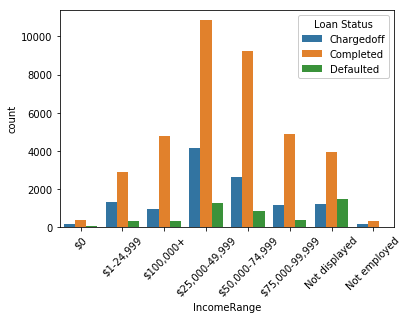

In [49]:
ax = sns.countplot(data = df, x = 'IncomeRange', hue = 'LoanStatus')
plt.xticks(rotation=45)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Loan Status');


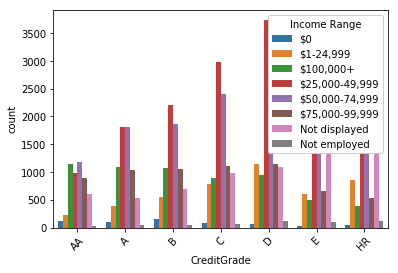

In [50]:
ax = sns.countplot(data = df, x = 'CreditGrade', hue = 'IncomeRange')
plt.xticks(rotation=45)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Income Range');


I do not like these visualizations. Because they are showing raw counts, I think its creates confusing impressions of proportions. 

### Moving to proportions:

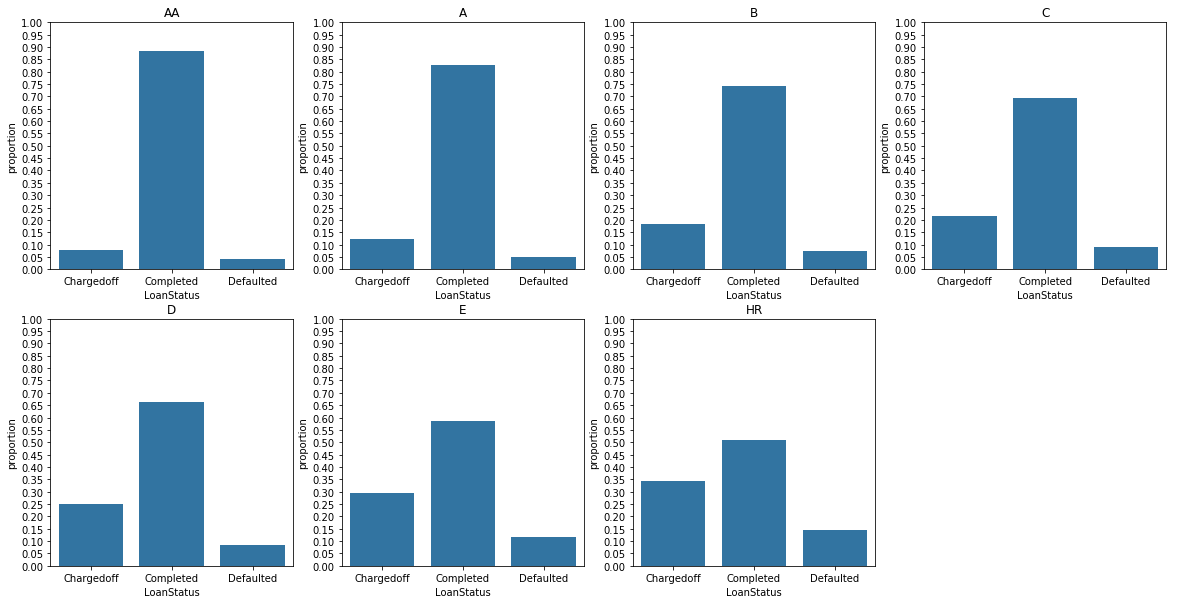

In [51]:
plt.figure(figsize = [20, 10])

i=1
for grade in df.CreditGrade.cat.categories:

    plt.subplot(2,4,i)
    n_points = df[df.CreditGrade == grade].shape[0]


    # generate tick mark locations and names
    tick_props = np.arange(0, 1.05, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    # create the plot
    base_color = sns.color_palette()[0]
    sns.countplot(data=df[df.CreditGrade == grade], x = 'LoanStatus', color = base_color)
    plt.yticks(tick_props * n_points, tick_names)

    plt.ylabel('proportion')
    plt.title(grade)
    i += 1


In [52]:
def bivariate_proportions(facet_col,x_col):
    '''
    Takes a column, x_col, and shows its values' proportions broken down by a seperate columns, facet_col. 
    '''
    plt.figure(figsize = [20, len(df[facet_col].cat.categories)+4])

    i=1
    for grade in df[facet_col].cat.categories:

        plt.subplot(math.ceil(len(df[facet_col].cat.categories)/4),4,i)
        n_points = df[df[facet_col] == grade].shape[0]


        # generate tick mark locations and names
        tick_props = np.arange(0, 1.05, 0.05)
        tick_names = ['{:0.2f}'.format(v) for v in tick_props]

        # create the plot
        base_color = sns.color_palette()[0]
        sns.countplot(data=df[df[facet_col] == grade], x = x_col, color = base_color)
        
        plt.xticks(rotation=45)
        
        plt.yticks(tick_props * n_points, tick_names)
        
        plt.ylabel('proportion')
        plt.title(grade)
        plt.tight_layout()
        i += 1;

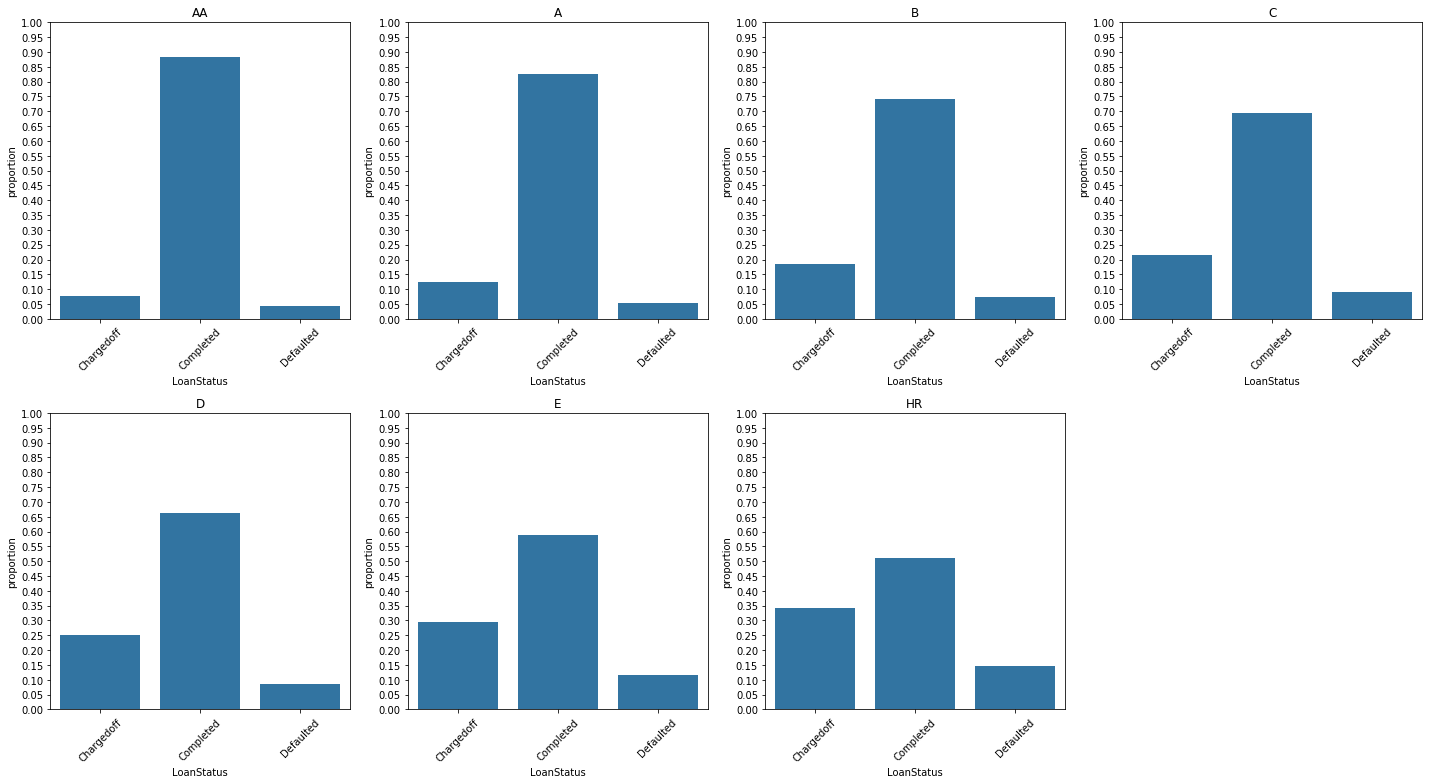

In [53]:
# Test
bivariate_proportions('CreditGrade','LoanStatus')

This seems clearer.   

#### Income?

In [54]:
df.IncomeRange.value_counts()

$25,000-49,999    16293
$50,000-74,999    12737
Not displayed      6700
$75,000-99,999     6423
$100,000+          6046
$1-24,999          4551
$0                  603
Not employed        530
Name: IncomeRange, dtype: int64

#### Define:
Order income categories
#### Code:

In [55]:
income = CategoricalDtype(categories=['Not displayed','Not employed', '$0','$1-24,999','$25,000-49,999',
                                      '$50,000-74,999','$75,000-99,999','$100,000+'], ordered=True)
df['IncomeRange'] = df['IncomeRange'].astype(income)


#### Test:

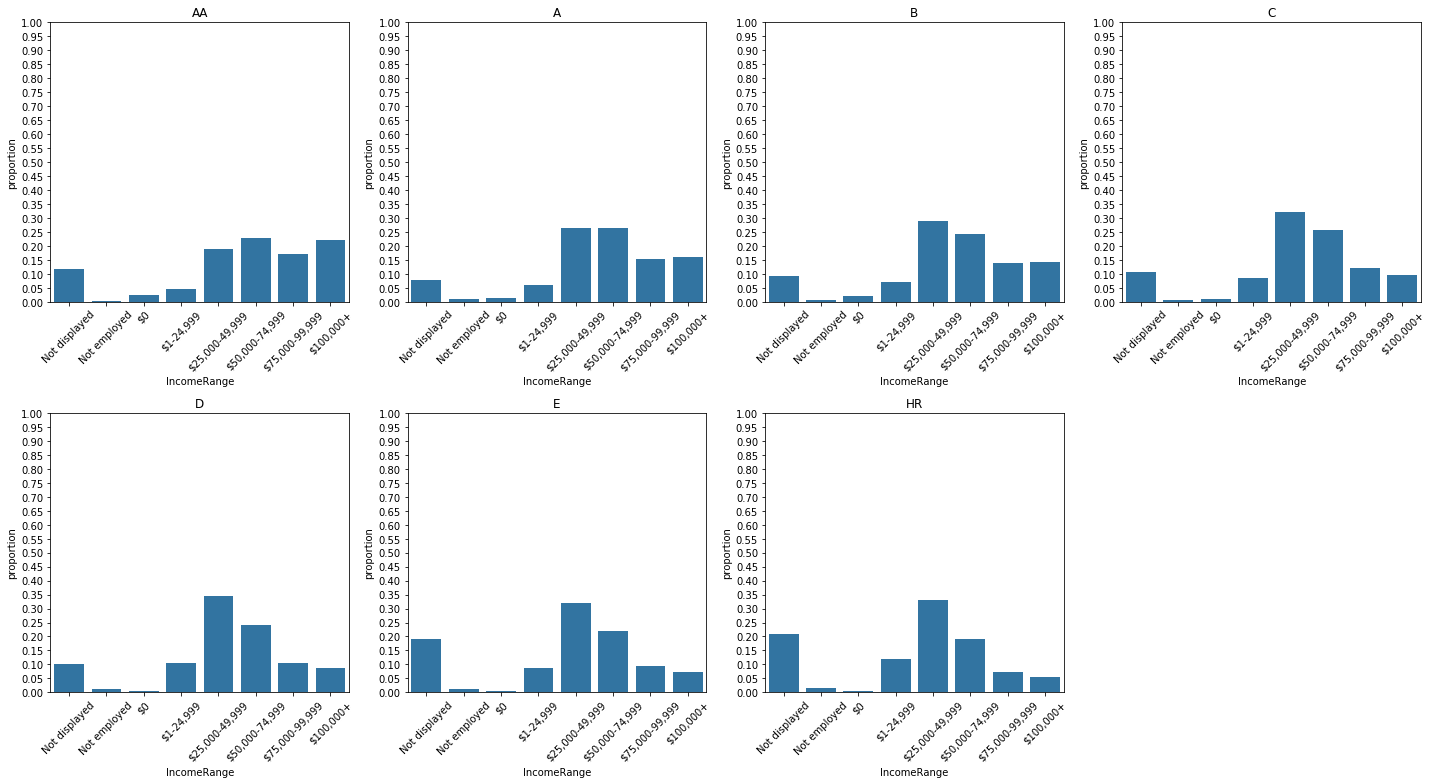

In [56]:
bivariate_proportions('CreditGrade','IncomeRange')

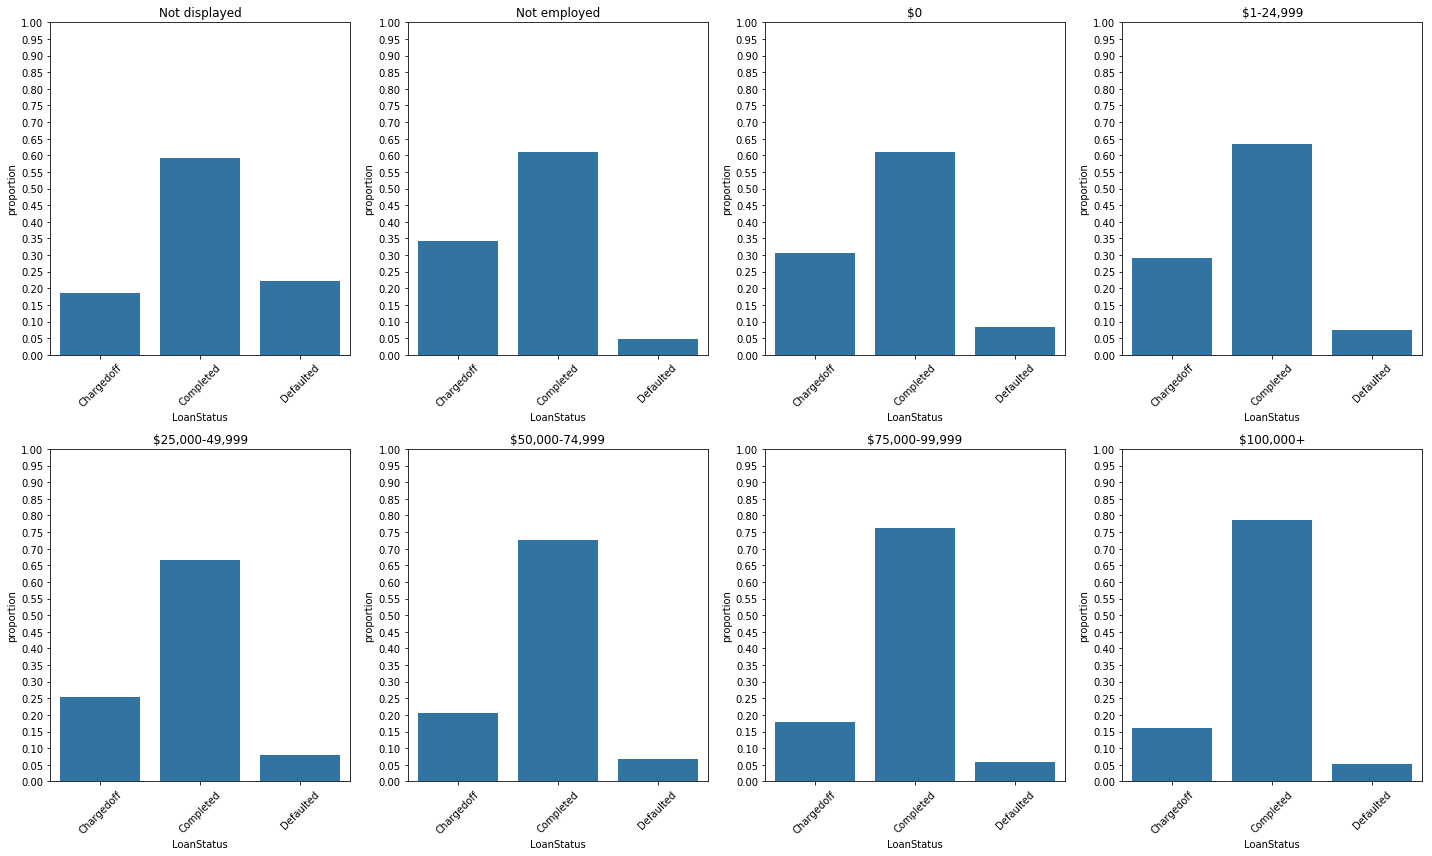

In [57]:
bivariate_proportions('IncomeRange','LoanStatus')

Maybe. Higher incomes have both higher completed rates...and credit grades.


#### Occupation?

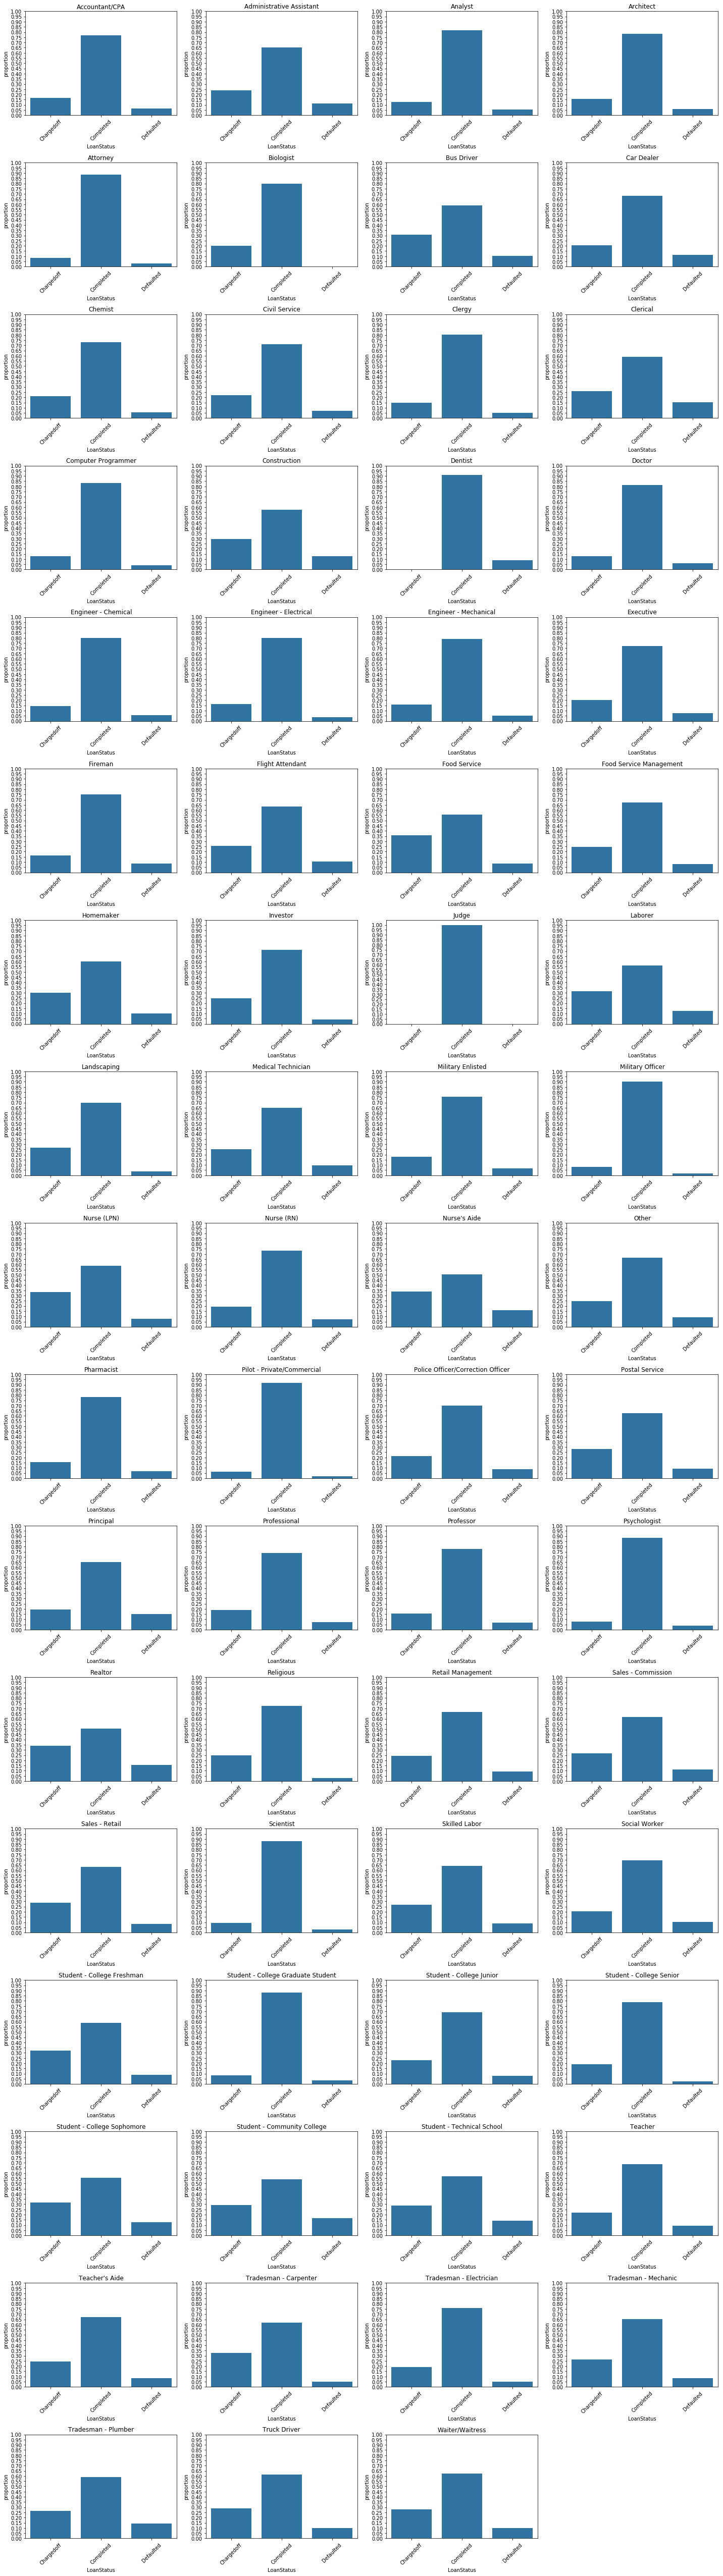

In [58]:
bivariate_proportions('Occupation','LoanStatus')

In [59]:
df.Occupation.value_counts()

Other                                13980
Professional                          6487
Computer Programmer                   2481
Administrative Assistant              1920
Sales - Commission                    1801
Executive                             1783
Analyst                               1766
Clerical                              1711
Teacher                               1641
Accountant/CPA                        1493
Sales - Retail                        1423
Skilled Labor                         1167
Retail Management                     1163
Military Enlisted                      817
Nurse (RN)                             810
Construction                           791
Laborer                                722
Police Officer/Correction Officer      664
Civil Service                          649
Truck Driver                           639
Engineer - Mechanical                  625
Engineer - Electrical                  545
Food Service                           525
Food Servic

Probably not? Right now its too segmented. We could try looking at only the larger categories, or grouping related fields. This could lead to some interesting explorations, especially looking for findings that can't just by IncomeRange. But this is a back burner idea. 

#### Employment Status?

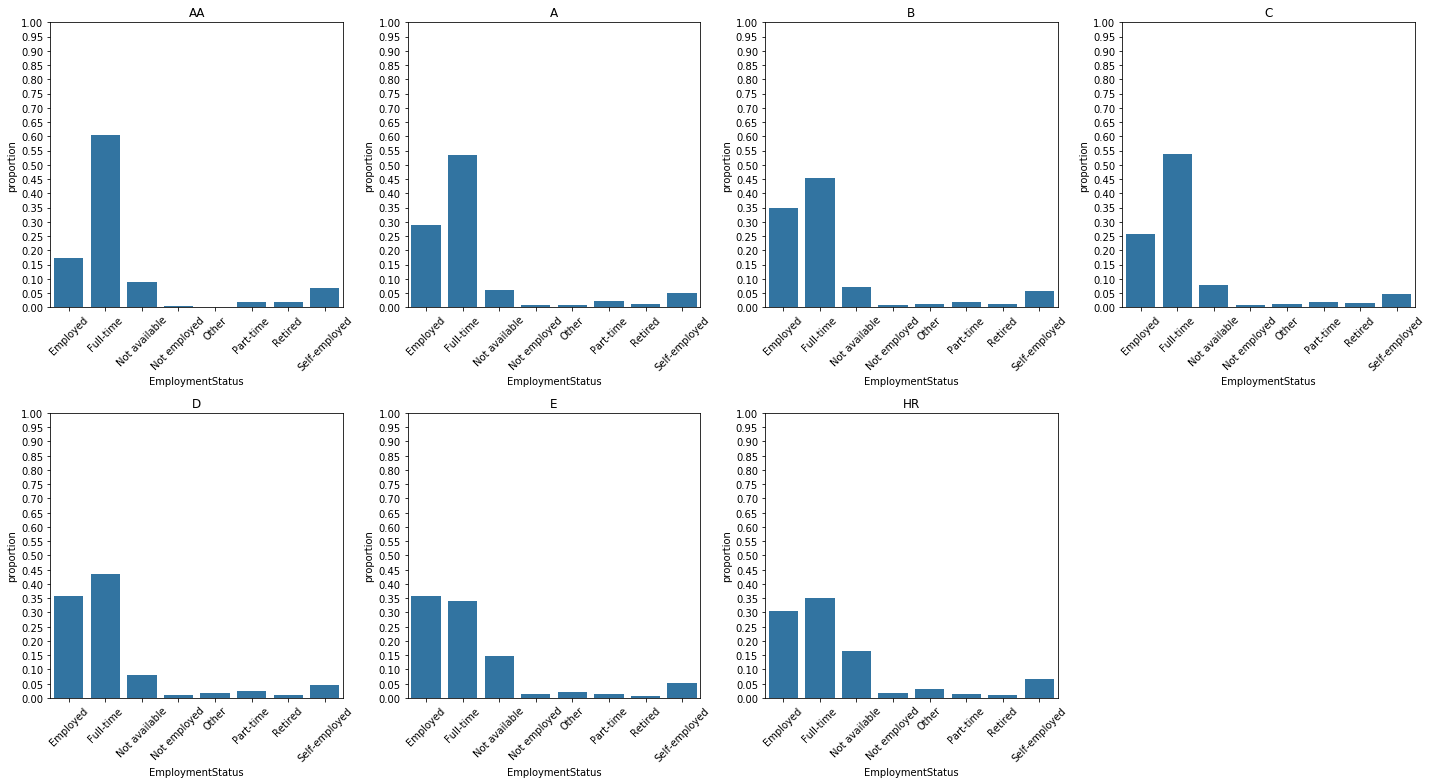

In [60]:
bivariate_proportions('CreditGrade','EmploymentStatus')

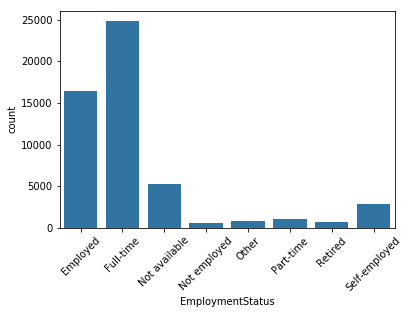

In [61]:
sns.countplot(data = df, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation=45);

I don't know what 'Employed' means, as it seems to be distinct from "Full-time". My first guess would be "salaried", but that's not supported by being more common in high risk groups. Contract work? It's overall count seems pretty high for that time period.

Given that I don't know the difference between the two largest groups, I don't feel comfortable using this variable without being able to ask questions.


#### Listing Category?

In [62]:
listing_type = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 
                4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8: 'Baby&Adoption',
                9: 'Boat', 10: 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Gen Loans', 
                13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 
                17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'
 }
df['ListingCategory'] = df['ListingCategory (numeric)']
df['ListingCategory'].replace(listing_type, inplace=True)
df['ListingCategory'] = df['ListingCategory'].astype('category')

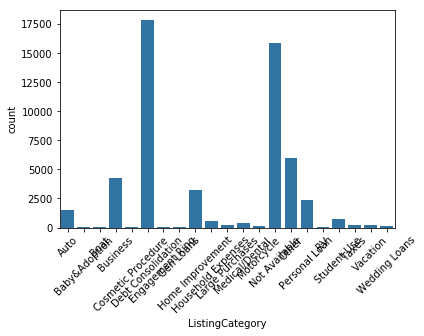

In [63]:

sns.countplot(data = df, x = 'ListingCategory', color = base_color)
plt.xticks(rotation=45);

In [64]:
df.ListingCategory.value_counts()

Debt Consolidation    17792
Not Available         15897
Other                  6015
Business               4239
Home Improvement       3231
Personal Loan          2392
Auto                   1531
Student Use             750
Household Expenses      597
Medical/Dental          370
Taxes                   214
Vacation                198
Large Purchases         181
Wedding Loans           171
Motorcycle               94
Engagement Ring          63
Cosmetic Procedure       44
Baby&Adoption            40
Boat                     28
Gen Loans                19
RV                       17
Name: ListingCategory, dtype: int64

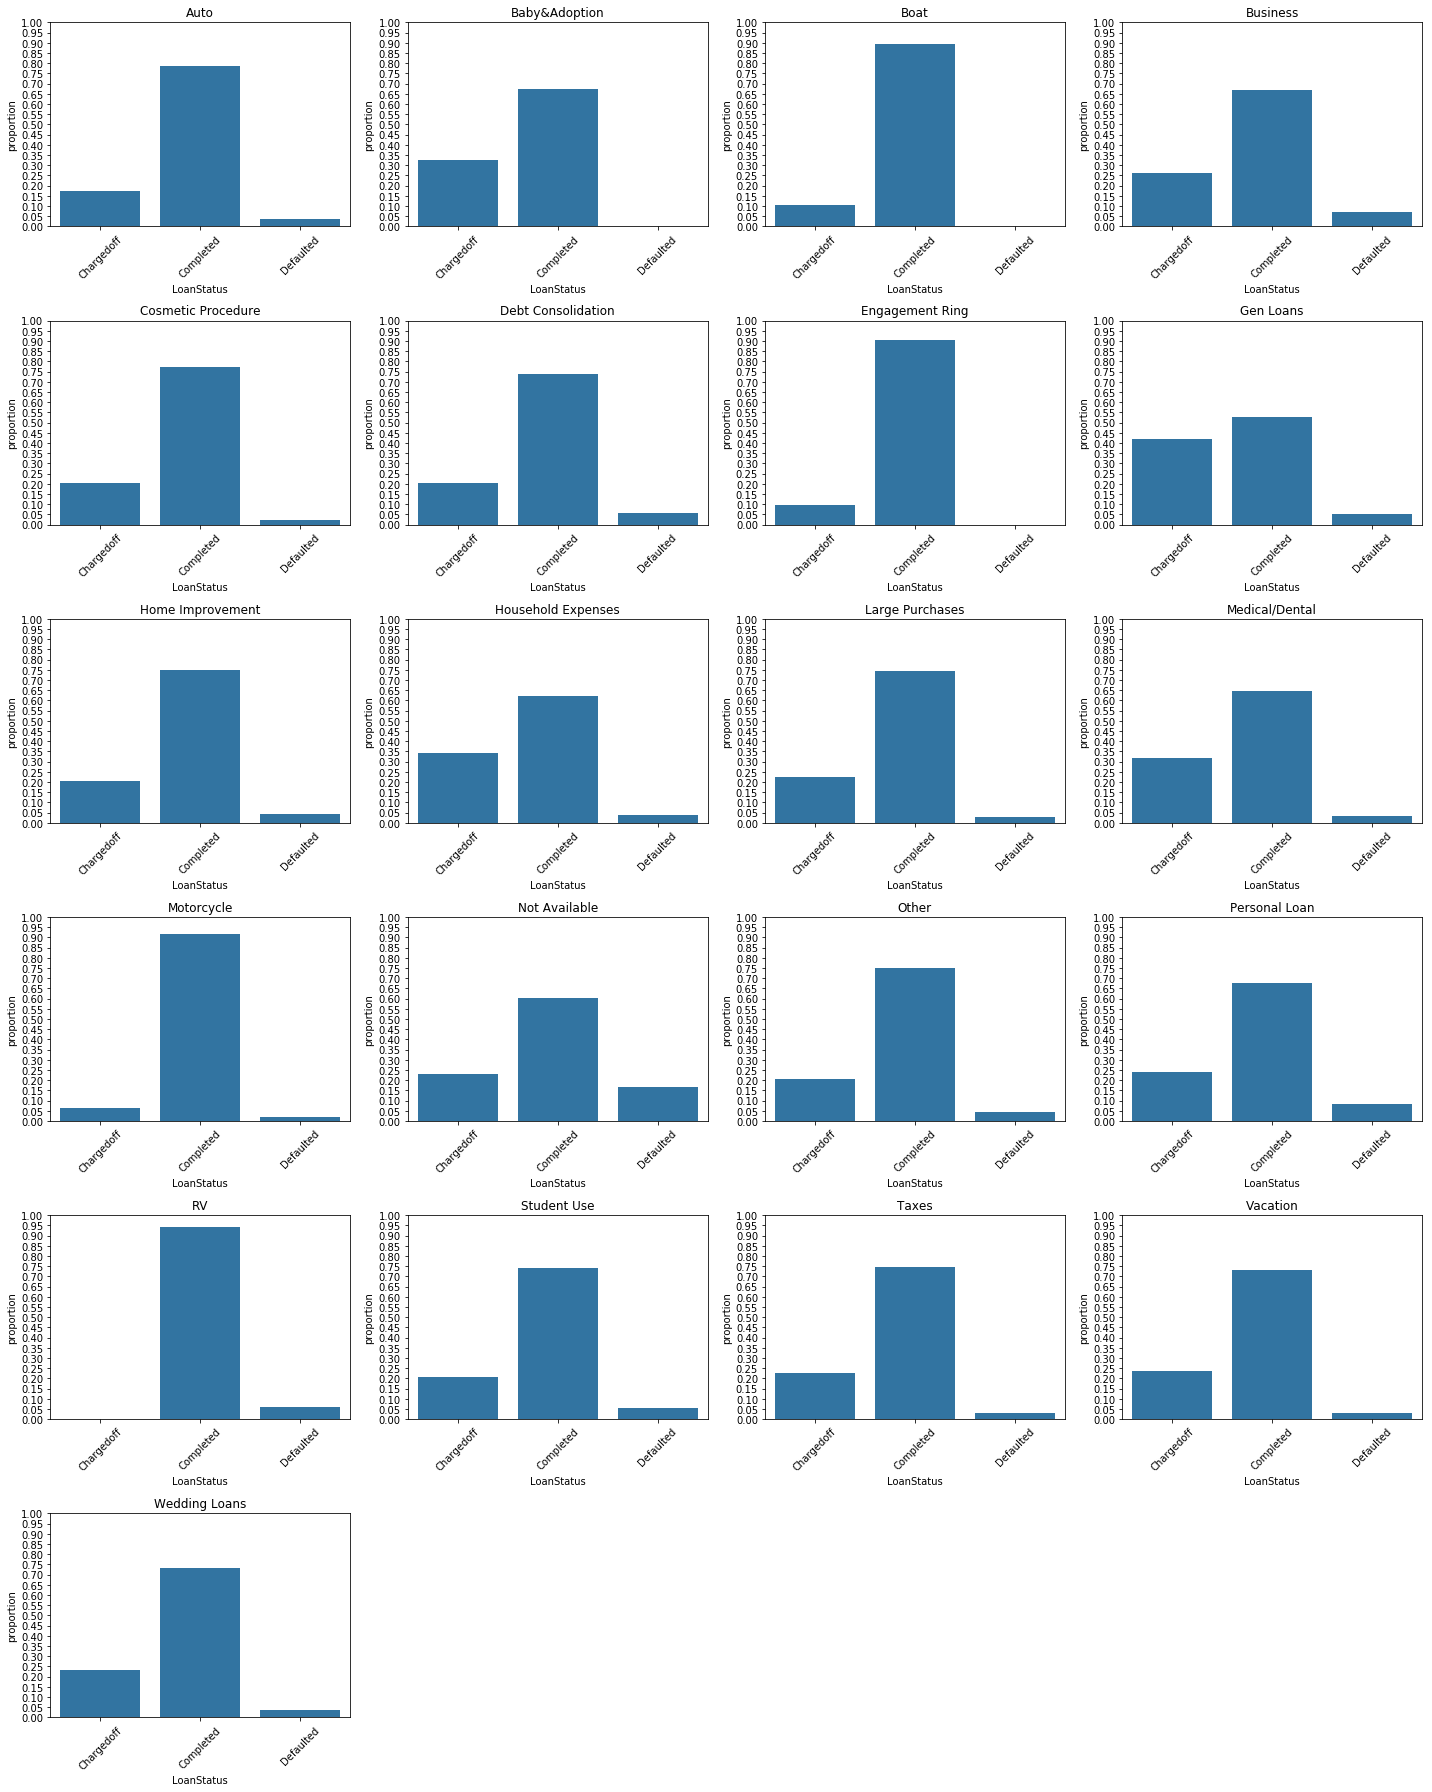

In [65]:
bivariate_proportions('ListingCategory','LoanStatus')

Interesting. "Debt Consolidation" and "Not Available" seem to dominate. I'm not sure I want to go anywhere with this one, but its good to know.

#### Time?

These first attempts at dealing with time are really bad and misleading

### Multivariate Exploration

In [66]:
def completed_percent_by_time(by): 
    '''
    Depreciated. Was an attempt to compare completion rates by time, but does not handle the gap in data well
    '''
    
    rolling_count = df[['LoanOriginationDate',by,  'LoanStatus','ListingKey']].sort_values('LoanOriginationDate').groupby([ pd.Grouper(key = 'LoanOriginationDate', 
                                            freq = '3m'),by,'LoanStatus']).agg(['count'])
    rolling_count.columns = rolling_count.columns.tolist()
    
    rolling_rate = rolling_count.groupby(level=[0,1]).apply(lambda x: 100 * x / float(x.sum()))
    # make colums from index
    
    rolling_rate = rolling_rate.reset_index()
    # remove 2nd level of column index
    rolling_rate.columns = rolling_rate.columns.get_level_values(0)

    # rename colums (your choice)
    rolling_rate.columns = ['LoanOriginationDate',by,  "LoanStatus", "Percentage"]
    return rolling_rate[rolling_rate['LoanStatus'] == 'Completed']
    
                

In [67]:
credit_grade_time_df = completed_percent_by_time('CreditGrade')
credit_grade_time_df[25:35]

,LoanOriginationDate,CreditGrade,LoanStatus,Percentage
70,2007-04-30,AA,Completed,90.133333
73,2007-04-30,A,Completed,75.081967
76,2007-04-30,B,Completed,67.024129
79,2007-04-30,C,Completed,59.402460
82,2007-04-30,D,Completed,56.302521
85,2007-04-30,E,Completed,46.296296
88,2007-04-30,HR,Completed,35.239852
91,2007-07-31,AA,Completed,86.890244
94,2007-07-31,A,Completed,73.699422
97,2007-07-31,B,Completed,65.707965


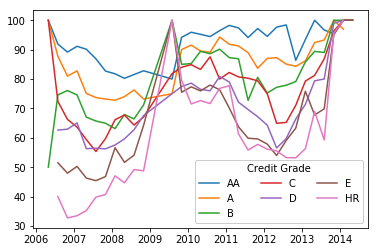

In [68]:
for grade in df.CreditGrade.cat.categories:
    plt.plot(credit_grade_time_df.query(f'CreditGrade=="{grade}"')['LoanOriginationDate'], 
             credit_grade_time_df.query(f'CreditGrade=="{grade}"')['Percentage'])
    


plt.legend(loc = 0, ncol = 3, framealpha = 1, title = 'Credit Grade', labels=df.CreditGrade.cat.categories)



In [69]:
credit_grade_time_df[(credit_grade_time_df['LoanOriginationDate'] > '2008-10-1') & (credit_grade_time_df['LoanOriginationDate'] <= '2009-12-31')]

,LoanOriginationDate,CreditGrade,LoanStatus,Percentage
196,2008-10-31,AA,Completed,82.804233
199,2008-10-31,A,Completed,73.190349
202,2008-10-31,B,Completed,71.189979
205,2008-10-31,C,Completed,67.073171
208,2008-10-31,D,Completed,67.561983
211,2008-10-31,E,Completed,64.255319
214,2008-10-31,HR,Completed,48.770492
217,2009-07-31,AA,Completed,80.000000
219,2009-07-31,A,Completed,75.000000
220,2009-07-31,B,Completed,100.000000


In [70]:
df.sort_values('LoanOriginationDate')[(df['LoanOriginationDate'] > '2008-10-15') & (df['LoanOriginationDate'] <= '2009-5-31')]

/home/jeremy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
112648,CD903432172929840322046,407799,2008-10-03 08:10:34.813,AA,36,Completed,2011-10-16,0.09378,0.0800,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,2,KS,Computer Programmer,Full-time,15.0,True,False,NaN,2008-10-01 15:48:15.073,800.0,819.0,2000-10-24,18.0,18.0,22.0,9,75.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,...,64889.0,20.0,1.00,2.0,0.31,"$50,000-74,999",True,4333.333333,D5AC34348829914596B9B0D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,65,37798,5000,2008-10-16,Q4 2008,E99D343400136232666468E,156.68,5640.49,4999.99,640.50,-80.05,0.00,0.00,0.00,0.00,1.0,0,0,0.0,233,Home Improvement
73560,32F13432522225313754654,408249,2008-10-04 06:58:10.267,D,36,Completed,2011-05-24,0.18386,0.1620,0.1520,NaN,NaN,NaN,NaN,NaN,NaN,1,GA,Other,Full-time,7.0,True,False,NaN,2008-09-21 23:37:06.110,600.0,619.0,1982-12-01,31.0,25.0,83.0,29,1271.0,1.0,6.0,0.0,0.0,5.0,0.0,0.0,...,5461.0,67.0,0.76,2.0,0.27,"$100,000+",True,13666.666667,14283434135436043242951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,65,37801,4000,2008-10-16,Q4 2008,BD4B3383133514734991027,141.02,5027.23,3999.99,1027.24,-63.42,0.00,0.00,0.00,0.00,1.0,0,0,0.0,172,Debt Consolidation
111889,2AE63432931622013A442EB,409908,2008-10-07 14:08:30.273,D,36,Completed,2011-10-16,0.21608,0.1938,0.1838,NaN,NaN,NaN,NaN,NaN,NaN,1,MD,Analyst,Full-time,351.0,False,False,NaN,2008-10-07 14:07:08.530,600.0,619.0,1994-11-15,8.0,8.0,30.0,6,325.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,...,2600.0,26.0,0.76,2.0,0.20,"$75,000-99,999",True,6588.000000,FEF034351215253002B178D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,65,37785,7500,2008-10-16,Q4 2008,C9C93385386108573366D6F,234.19,9961.13,7500.03,2461.10,-127.01,0.00,0.00,0.00,0.00,1.0,0,0,0.0,277,Debt Consolidation
111076,80B234337590431811470A1,409500,2008-10-06 20:51:57.793,D,36,Completed,2011-10-16,0.26211,0.2392,0.2292,NaN,NaN,NaN,NaN,NaN,NaN,3,CA,Sales - Retail,Self-employed,12.0,False,False,NaN,2008-10-06 20:51:45.890,620.0,639.0,1990-02-01,3.0,3.0,14.0,2,29.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.0,0.57,1.0,NaN,"$50,000-74,999",False,4166.666667,B33A34343046804236FD7AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,65,37781,2500,2008-10-16,Q4 2008,7EC23431270584255406431,97.98,3527.06,2500.01,1027.05,-42.94,0.00,0.00,0.00,0.00,1.0,0,0,0.0,48,Business
107515,140D3433827922433052056,408849,2008-10-05 18:32:00.260,C,36,Defaulted,2009-08-17,0.22681,0.1700,0.1600,NaN,NaN,NaN,NaN,NaN,NaN,1,WI,Engineer - Electrical,Full-time,11.0,False,False,NaN,2008-10-05 18:30:49.473,

**Note:** Out of order again. I had still not understood what was happening at this stage, and these tests were created later while scrolling back through my code.

In [71]:
income_time_df = completed_percent_by_time('IncomeRange')

In [72]:
def time_graph(by):
    '''
    Depreciated. Use time_graph_v2() instead
    '''
    new_df = completed_percent_by_time(by)
   
    for cat in df[by].cat.categories:
        print(cat, by)
        plt.plot(new_df.query(f'{by}=="{cat}"')['LoanOriginationDate'], new_df.query(f'{by}=="{cat}"')['Percentage'])
    


        plt.legend(loc = 0, ncol = 3, framealpha = 1, title = by, labels = new_df[by].cat.categories)

Not displayed IncomeRange
Not employed IncomeRange
$0 IncomeRange
$1-24,999 IncomeRange
$25,000-49,999 IncomeRange
$50,000-74,999 IncomeRange
$75,000-99,999 IncomeRange
$100,000+ IncomeRange


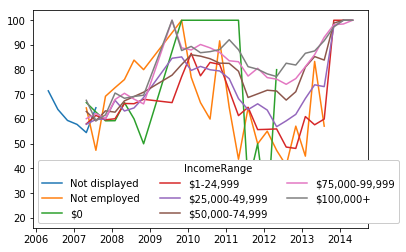

In [73]:
time_graph('IncomeRange')

Employed EmploymentStatus
Full-time EmploymentStatus
Not available EmploymentStatus
Not employed EmploymentStatus
Other EmploymentStatus
Part-time EmploymentStatus
Retired EmploymentStatus
Self-employed EmploymentStatus


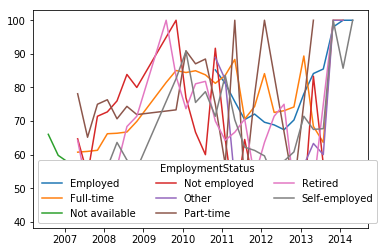

In [74]:
time_graph('EmploymentStatus')

In [75]:
homeowner = completed_percent_by_time('IsBorrowerHomeowner')

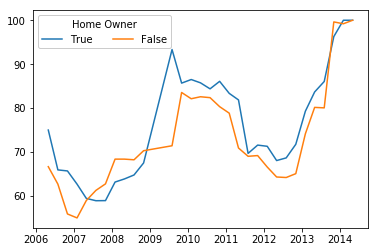

In [76]:
plt.plot(homeowner.query('IsBorrowerHomeowner == True')['LoanOriginationDate'], homeowner.query('IsBorrowerHomeowner == True')['Percentage'])
plt.plot(homeowner.query('IsBorrowerHomeowner == False')['LoanOriginationDate'], homeowner.query('IsBorrowerHomeowner == False')['Percentage'])
plt.legend(loc = 0, ncol = 3, framealpha = 1, title = 'Home Owner', labels = ['True','False'])

Finally something interesting! That flip in performance as we enter the recession.

#### Home owner?

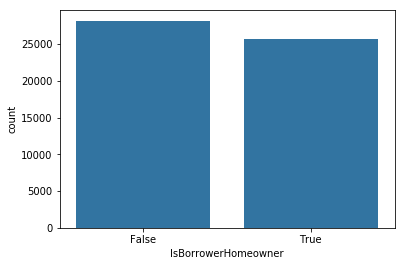

In [77]:
sns.countplot(data=df, x='IsBorrowerHomeowner', color=base_color);

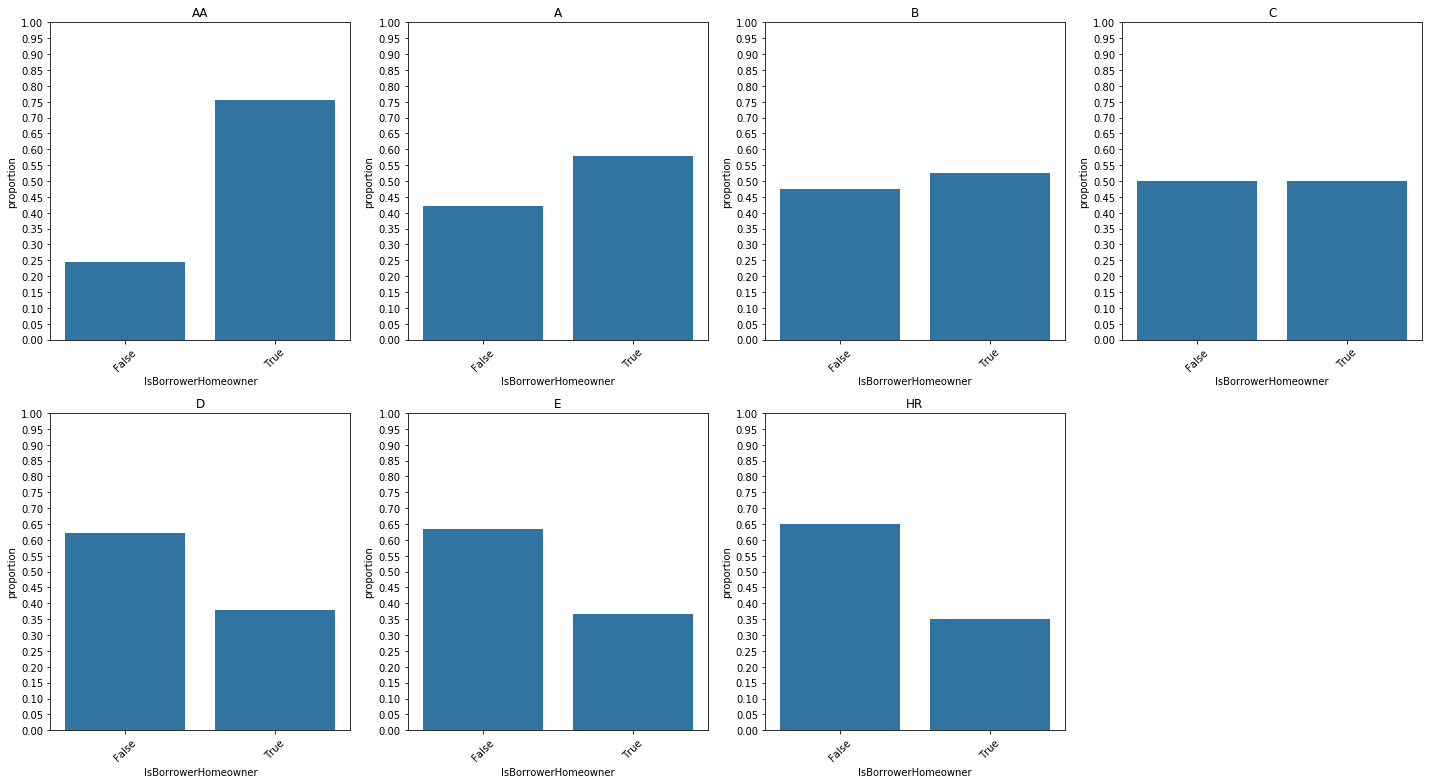

In [78]:
bivariate_proportions('CreditGrade','IsBorrowerHomeowner')

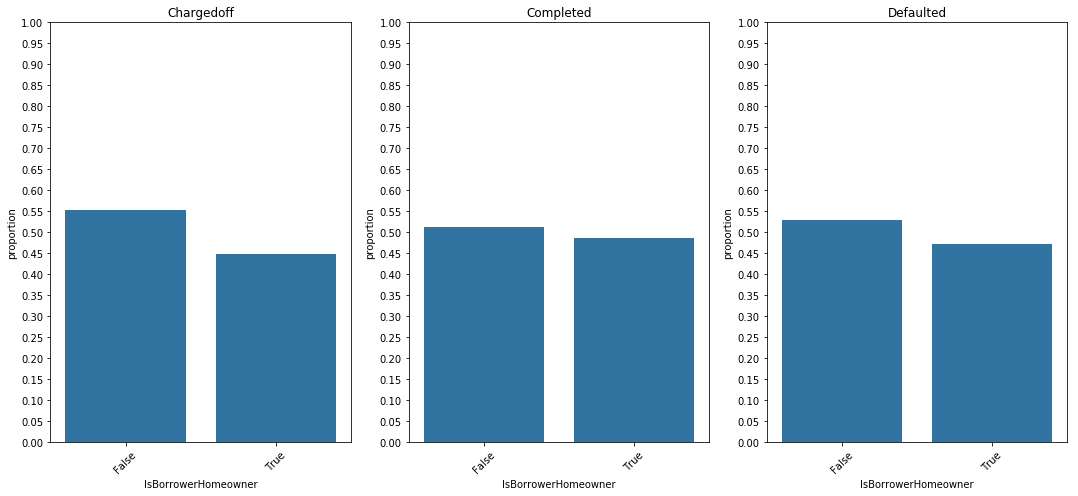

In [79]:
bivariate_proportions('LoanStatus','IsBorrowerHomeowner')

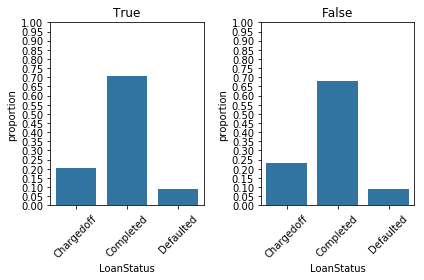

In [80]:


plt.subplot(1,2,1)
n_points = df[df['IsBorrowerHomeowner'] == True].shape[0]


# generate tick mark locations and names
tick_props = np.arange(0, 1.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    # create the plot

sns.countplot(data=df[df['IsBorrowerHomeowner'] == True], x = 'LoanStatus', color = base_color)
        
plt.xticks(rotation=45)
        
plt.yticks(tick_props * n_points, tick_names)
        
plt.ylabel('proportion')
plt.title('True')
plt.tight_layout()

plt.subplot(1,2,2)
n_points = df[df['IsBorrowerHomeowner'] == False].shape[0]


# generate tick mark locations and names
tick_props = np.arange(0, 1.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    # create the plot

sns.countplot(data=df[df['IsBorrowerHomeowner'] == False], x = 'LoanStatus', color = base_color)
        
plt.xticks(rotation=45)
        
plt.yticks(tick_props * n_points, tick_names)
        
plt.ylabel('proportion')
plt.title('False')
plt.tight_layout()


Definitely want to keep exploring

#### Term?

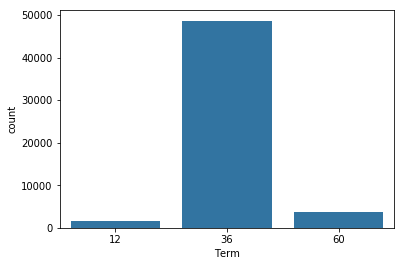

In [81]:
sns.countplot(data = df, x = 'Term', color = base_color);

36 month is definitely the most frequent.

### A sense of doubt finally bubbles to the surface

In [82]:
df[(df['LoanOriginationDate'] > '2009-6-1') & (df['LoanOriginationDate'] <= '2010-1-1')].sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory
36711,8924346300659891289C803,423575,2009-09-08 14:15:16.897,A,36,Completed,2012-09-21,0.12410,0.1030,0.0930,0.0717,0.021,0.0717,6.0,A,9.0,7,AZ,Other,Full-time,18.0,False,False,NaN,2009-09-08 12:43:12,720.0,739.0,1994-10-15,7.0,5.0,24.0,4,53.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,...,5525.0,20.0,0.95,0.0,0.10,"$25,000-49,999",True,3333.333333,19873566328558901E0EB74,1.0,17.0,17.0,0.0,0.0,3700.0,1767.20,87.0,0,NaN,54,38606,2400,2009-09-21,Q3 2009,B6E33415903952452DE7DFB,77.78,2799.84,2400.01,399.83,-38.82,0.0,0.0,0.0,0.0,1.0,0,0,0.0,87,Other
26837,B64B34676399157808727DD,431556,2009-11-03 07:29:10.880,A,36,Completed,2011-06-29,0.17626,0.1545,0.1445,0.1229,0.021,0.1229,6.0,A,8.0,1,TN,Other,Full-time,194.0,True,False,NaN,2009-10-14 12:09:45,760.0,779.0,1991-08-21,9.0,9.0,26.0,7,1207.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,...,84686.0,23.0,1.00,0.0,0.27,"$75,000-99,999",True,6833.333333,140D35710961330350EDD69,1.0,21.0,21.0,0.0,0.0,9500.0,2815.03,11.0,0,NaN,52,39477,10600,2009-11-16,Q4 2009,819F34108664470437ECEC2,369.79,12529.05,10599.99,1929.06,-124.84,0.0,0.0,0.0,0.0,1.0,0,0,0.0,281,Debt Consolidation
7650,999C3466227562986112670,431145,2009-10-30 14:13:44.187,B,36,Completed,2010-10-22,0.19703,0.1750,0.1650,0.1121,0.050,0.1121,5.0,B,8.0,6,OH,Retail Management,Full-time,82.0,True,False,NaN,2009-10-15 10:46:46,760.0,779.0,1983-08-20,19.0,16.0,55.0,11,1109.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,...,56277.0,52.0,1.00,3.0,0.27,"$75,000-99,999",True,6933.333333,5CD53571580320603DD9967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,52,39479,4000,2009-11-16,Q4 2009,15EE3382647107758C2EE30,143.61,4221.82,3999.97,221.85,-12.68,0.0,0.0,0.0,0.0,1.0,0,0,0.0,160,Auto
22758,04E234695728460300AC961,434968,2009-11-23 11:34:38.123,C,36,Completed,2010-05-06,0.23886,0.2010,0.1910,0.1216,0.065,0.1216,4.0,C,10.0,5,MI,Other,Full-time,39.0,False,False,NaN,2009-11-17 15:32:25,660.0,679.0,1997-09-08,7.0,7.0,18.0,5,162.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3375.0,13.0,0.92,0.0,0.24,"$25,000-49,999",True,2454.166667,9C613572297393527B2DD9B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,52,39710,1000,2009-11-30,Q4 2009,8BD63468709601947EE2053,37.21,1056.50,999.64,56.86,-2.83,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Student Use
90632,5310346742300107497697A,432171,2009-11-07 09:51:53.543,D,36,Completed,2012-03-15,0.21223,0.1900,0.1800,0.0758,0.100,0.0758,3.0,D,7.0,6,MI,Computer Programmer,Full-time,4.0,False,False,NaN,2009-11-07 06:23:17,640.0,659.0,2000-08-21,6.0,5

Now that I finally knew what I wanted explore (home ownership), this is where I finally confronted the fishiness in the middle dates of my time graphs and started back digging to figure out what was up with my graphs. You can see the damage and of this event throughout the notebook. The problem being we are missing data from Oct 2008 to July 2009. 

Thankfully, I figured this out! This would have been horrifying in a workplace to miss. I have to keep practicing and learning!

#### Let's Do The Timewarp Again!

In [83]:
def completed_percent_by_time_v2(by): 
    '''
    Takes a column, by, and calculates a 3 month moving average of "Completed" LoanStatus proportion.
    '''
    new_df = df.copy()
    new_df['Completed'] = np.where(df['LoanStatus'] =='Completed', 1, 0)
    new_df = new_df.sort_values('LoanOriginationDate').groupby(by).resample('1M',on='LoanOriginationDate').mean().rolling(3, center=True).mean()
    new_df.drop('IsBorrowerHomeowner', axis=1, inplace=True )
    return new_df.reset_index()

In [84]:
homeowner = completed_percent_by_time_v2('IsBorrowerHomeowner')
homeowner.sample(10)

,IsBorrowerHomeowner,LoanOriginationDate,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,EmploymentStatusDuration,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Completed
43,False,2009-11-30,431639.193952,36.000000,0.241061,0.216967,0.206854,0.107849,0.092255,0.107849,7.607351,68.240218,1.149611e-01,682.734802,701.734802,8.336422,7.093630,21.121721,5.680231,239.184193,1.115812,5.147148,0.285030,359.517392,2.550184,0.208613,0.012512,8246.437640,0.459656,8699.029770,17.416443,0.879336,0.493106,0.230105,0.840295,4082.243095,1.191435,20.718981,20.350231,0.334028,3.472222e-02,4982.592593,1480.742493,21.146255,179.343361,17.603105,52.000000,39503.862118,3564.912436,132.031991,4034.450856,3135.587804,898.863052,-42.620440,-10.114639,429.017395,412.436654,19.151952,1.000000,0.082841,7.229833e-02,5.148945e+01,113.354665,0.823664
1,False,2006-05-31,12980.465503,36.000000,0.202872,0.192843,0.184796,NaN,NaN,NaN,NaN,NaN,5.678233e-02,614.662198,633.662198,NaN,NaN,20.047951,1.225543,41.452428,2.227139,NaN,1.867808,NaN,4.599385,0.360923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163950,0.985992,4470.468140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435.805793,25.596141,94.000000,976.561765,4924.912410,176.010011,5439.924165,4318.340668,1121.583497,-30.121300,-5.653876,599.374242,592.784191,10.497448,1.000000,0.000000,0.000000e+00,0.000000e+00,33.774698,0.666416
72,False,2012-04-30,576129.987069,40.796818,0.270840,0.234235,0.224235,0.216158,0.102730,0.113428,5.796719,73.670577,3.125079e-02,685.851425,704.851425,7.566606,6.600693,21.542893,5.421219,227.950025,1.435069,4.630865,0.362431,583.580487,3.965928,0.334821,0.012325,8019.254660,0.430237,7987.315052,18.342379,0.881735,0.901095,0.259795,0.833963,4484.995531,1.454300,20.775342,19.417261,1.198173,1.599084e-01,7376.984317,2590.466547,-20.184217,138.078560,13.197243,23.000000,64003.503607,6600.742389,239.297859,5468.247972,4422.098736,1046.149236,-46.866569,-29.816278,2159.152495,2113.472728,43.757020,0.999793,0.017773,4.693245e-03,2.145423e+00,71.375621,0.627548
123,True,2008-08-31,376648.792238,36.000000,0.201531,0.185239,0.175112,NaN,NaN,NaN,NaN,87.177792,9.799777e-02,689.902736,708.902736,11.854234,10.590935,30.451611,7.928465,496.109999,2.191400,9.285673,0.588336,786.508747,3.464600,0.270902,0.023738,26627.089947,0.586413,15084.769672,25.929994,0.856027,1.035341,0.249874,0.873153,5909.790332,1.079265,11.208611,11.035859,0.172752,5.782412e-19,6751.084658,3155.042602,5.227774,414.655498,17.781724,67.000000,35502.885154,6995.230287,246.214525,6679.046399,5274.987644,1404.058755,-81.138009,-39.203948,1702.385403,1639.744614,91.273239,1.000000,0.157211,9.478815e-02,1.032622e+02,163.842501,0.670116
41,False,2009-09-30,422393.787482,36.000000,0.226992,0.201330,0.191314,0.101347,0.084063,0.101347,8.032076,65.519391,1.081727e-01,679.221934,698.221934,8.740143,7.486137,21.922007,5.88

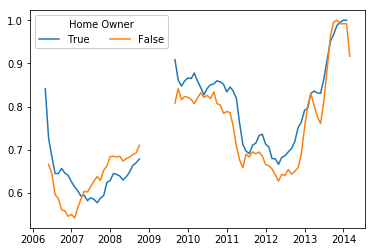

In [85]:
plt.plot(homeowner.query('IsBorrowerHomeowner == True')['LoanOriginationDate'], homeowner.query('IsBorrowerHomeowner == True')['Completed'])
plt.plot(homeowner.query('IsBorrowerHomeowner == False')['LoanOriginationDate'], homeowner.query('IsBorrowerHomeowner == False')['Completed'])
plt.legend(loc = 0, ncol = 2, framealpha = 1, title = 'Home Owner', labels = ['True','False']);

In [86]:
def time_graph_v2(by):
    '''
    Takes a column, by, and graphs a 3 month moving average of "Completed" LoanStatus proportion.
    '''
    new_df = completed_percent_by_time_v2(by)
    print(f" Here {by}")
    for cat in df[by].cat.categories:
        print(cat, by)
        plt.plot(new_df.query(f'{by}=="{cat}"')['LoanOriginationDate'], new_df.query(f'{by}=="{cat}"')['Completed'])
    


        plt.legend(loc = 0, ncol = 3, framealpha = 1, title = by, labels = new_df[by].cat.categories)

 Here CreditGrade
AA CreditGrade
A CreditGrade
B CreditGrade
C CreditGrade
D CreditGrade
E CreditGrade
HR CreditGrade


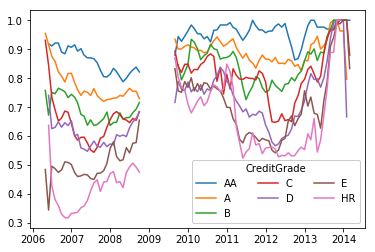

In [87]:
time_graph_v2('CreditGrade')

 Here IncomeRange
Not displayed IncomeRange
Not employed IncomeRange
$0 IncomeRange
$1-24,999 IncomeRange
$25,000-49,999 IncomeRange
$50,000-74,999 IncomeRange
$75,000-99,999 IncomeRange
$100,000+ IncomeRange


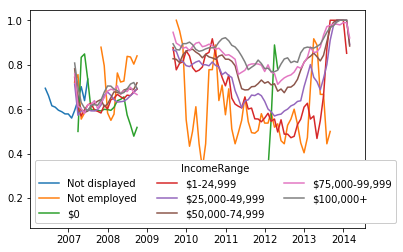

In [88]:
time_graph_v2('IncomeRange')

In [89]:
def completed_percent_by_time_v3(cat_df, by): 
    '''
    Takes a column, by, and calculates a 3 month moving average of "Completed" LoanStatus proportion.
    '''
    new_df = cat_df.copy()
    new_df['Completed'] = np.where(new_df['LoanStatus'] =='Completed', 1, 0)
    new_df = new_df.sort_values('LoanOriginationDate').groupby(by).resample('1M',on='LoanOriginationDate').mean().rolling(3, center=True).mean()
    new_df.drop('IsBorrowerHomeowner', axis=1, inplace=True )
    
    return new_df.reset_index()

In [90]:
def time_graph_facet(facet_col, by):
    '''

    Takes a column, by, and graphs a 3 month moving average of "Completed" LoanStatus proportion, 
    faceted by facet_col
    '''
    plt.figure(figsize = [20, len(df[facet_col].cat.categories)+4])

    i=1
    for grade in df[facet_col].cat.categories:
        new_df = completed_percent_by_time_v3(df[df[facet_col] == grade],by)
        plt.subplot(3,4,i)
        for cat in new_df[by].unique():
           
            
            plt.plot(new_df.query(f'{by}=={cat}')['LoanOriginationDate'], new_df.query(f'{by}=={cat}')['Completed'])
        plt.ylim(0.3,1)
        plt.xlim(min(df['LoanOriginationDate']), max(df['LoanOriginationDate']))
        plt.legend(loc = 0, ncol = 3, framealpha = 1, title = by, labels = new_df[by].unique())
        plt.title(grade)
        i+=1
     

        
            

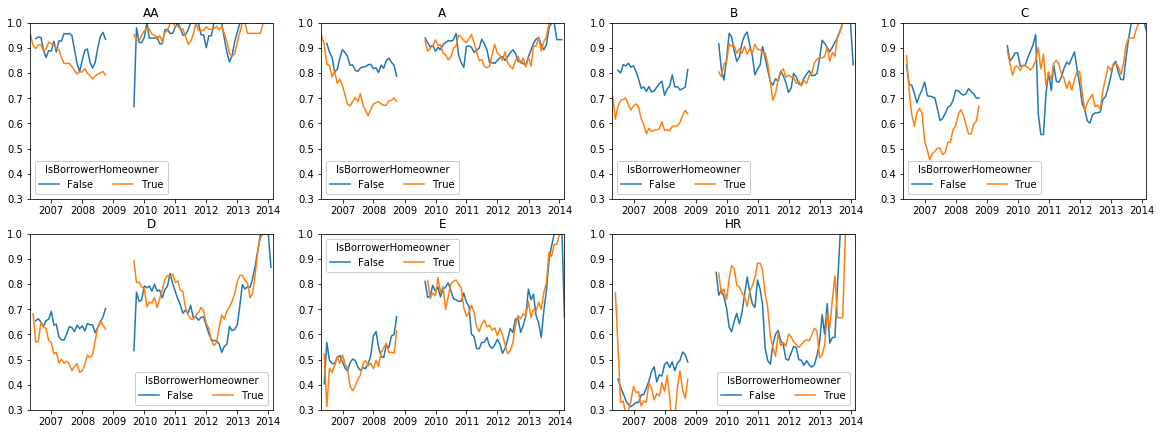

In [91]:
time_graph_facet('CreditGrade','IsBorrowerHomeowner')

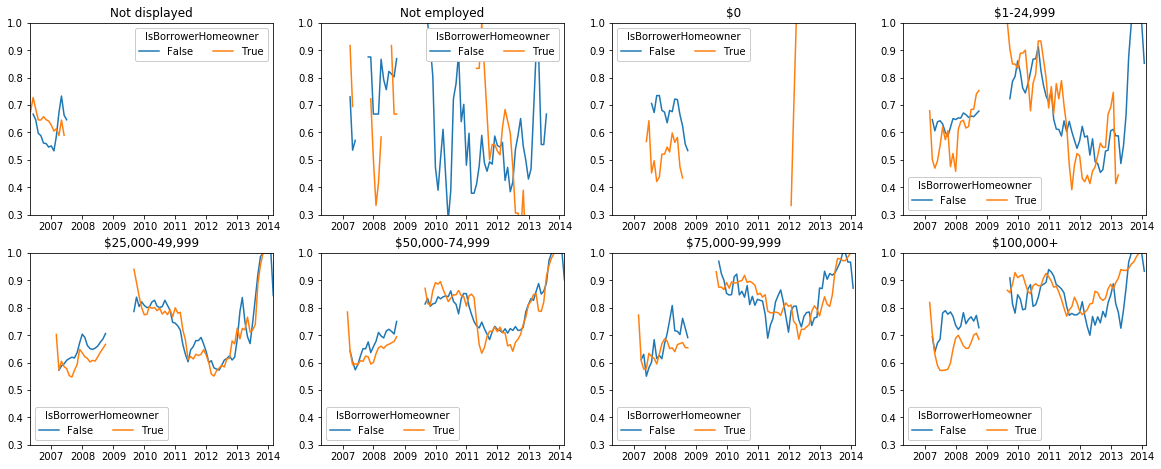

In [92]:
time_graph_facet('IncomeRange','IsBorrowerHomeowner')

#### BorrowerAPR?

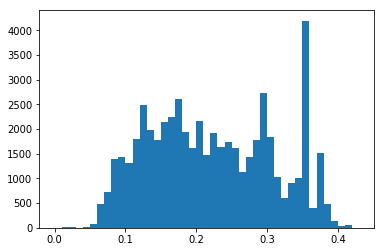

In [93]:
bin_edges = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin_edges);


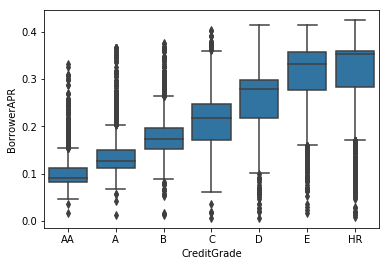

In [94]:
sns.boxplot(data = df, x = 'CreditGrade', y = 'BorrowerAPR', color = base_color);

As expected, but I'll want to include APR in my final presentation.